In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 1. Data loading and preprocessing

In [4]:
df_choc = pd.read_csv("Chocolate_Sales.csv")

In [5]:
df_choc.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04-Jan-22,"$5,320",180
1,Van Tuxwell,India,85% Dark Bars,01-Aug-22,"$7,896",94
2,Gigi Bohling,India,Peanut Butter Cubes,07-Jul-22,"$4,501",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27-Apr-22,"$12,726",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24-Feb-22,"$13,685",184


### (a) Data Exploration

In [6]:
df_choc.shape

(1094, 6)

In [7]:
df_choc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sales Person   1094 non-null   object
 1   Country        1094 non-null   object
 2   Product        1094 non-null   object
 3   Date           1094 non-null   object
 4   Amount         1094 non-null   object
 5   Boxes Shipped  1094 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 51.4+ KB


### (b) Data Transformation

In [8]:
#change type and format of Date Column
df_choc['Date'] = pd.to_datetime(df_choc['Date'], format='%d-%b-%y')

#Remove "$" and "," and "spaces" and change type into float of Amount Column
df_choc['Amount'] = df_choc['Amount'].str.replace('$', '', regex=False).str.replace(',', '', regex=False).str.strip().astype(float)

In [9]:
df_choc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Sales Person   1094 non-null   object        
 1   Country        1094 non-null   object        
 2   Product        1094 non-null   object        
 3   Date           1094 non-null   datetime64[ns]
 4   Amount         1094 non-null   float64       
 5   Boxes Shipped  1094 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 51.4+ KB


In [10]:
df_choc.sample(5)

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
131,Kaine Padly,Australia,Manuka Honey Choco,2022-01-12,2765.0,264
611,Brien Boise,UK,Almond Choco,2022-05-25,105.0,125
533,Van Tuxwell,India,Choco Coated Almonds,2022-04-13,5733.0,114
132,Beverie Moffet,New Zealand,White Choc,2022-03-24,7126.0,7
935,Barr Faughny,India,After Nines,2022-07-29,8190.0,109


In [11]:
df_choc.describe()

,Date,Amount,Boxes Shipped
count,1094,1094.000000,1094.000000
mean,2022-05-03 09:04:56.160877568,5652.308044,161.797989
min,2022-01-03 00:00:00,7.000000,1.000000
25%,2022-03-02 00:00:00,2390.500000,70.000000
50%,2022-05-11 00:00:00,4868.500000,135.000000
75%,2022-07-04 00:00:00,8027.250000,228.750000
max,2022-08-31 00:00:00,22050.000000,709.000000
std,NaN,4102.442014,121.544145


In [12]:
df_choc.tail()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
1089,Karlen McCaffrey,Australia,Spicy Special Slims,2022-05-17,4410.0,323
1090,Jehu Rudeforth,USA,White Choc,2022-06-07,6559.0,119
1091,Ches Bonnell,Canada,Organic Choco Syrup,2022-07-26,574.0,217
1092,Dotty Strutley,India,Eclairs,2022-07-28,2086.0,384
1093,Karlen McCaffrey,India,70% Dark Bites,2022-05-23,5075.0,344


In [13]:
df_choc.isnull().sum()

Sales Person     0
Country          0
Product          0
Date             0
Amount           0
Boxes Shipped    0
dtype: int64

In [14]:
df_choc.duplicated().sum()

0

# 2. Expolatory Data analysis

## (a) Sales Over Time
### Line plot to show total Amount over time.


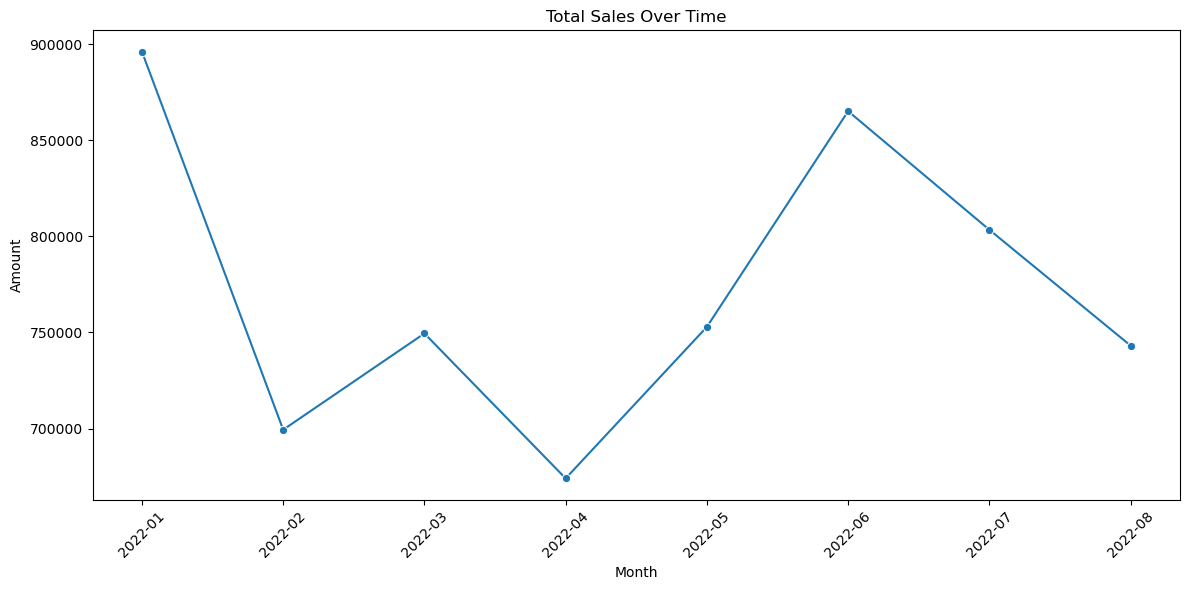

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

df_choc['Month'] = df_choc['Date'].dt.to_period('M').astype(str)
monthly_sales = df_choc.groupby('Month')['Amount'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='Month', y='Amount', marker='o')
plt.title('Total Sales Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## (b) Sales by Country
### Bar plot to compare total sales across countries.

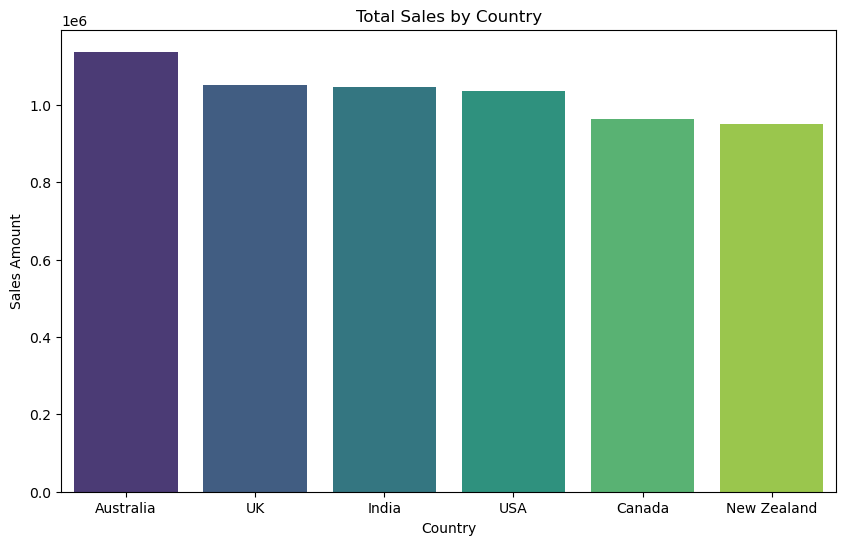

In [17]:
country_sales = df_choc.groupby('Country')['Amount'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=country_sales, x='Country', y='Amount', palette='viridis')
plt.title('Total Sales by Country')
plt.xlabel('Country')
plt.ylabel('Sales Amount')
plt.show()

## (c) Product Sales Distribution
###    Box plot to see distribution of Amount per Product.

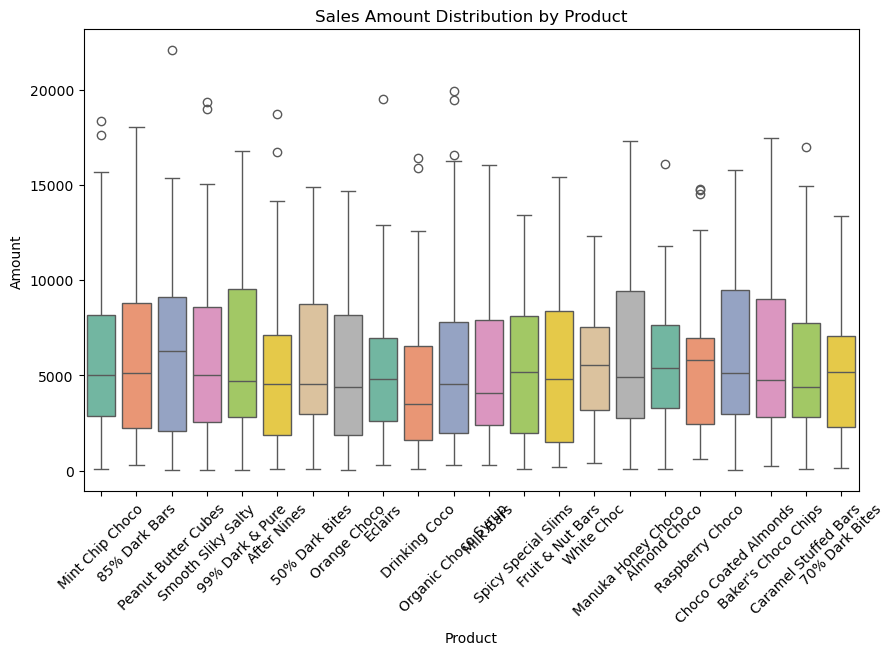

In [28]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_choc, x='Product', y='Amount', palette='Set2')
plt.title('Sales Amount Distribution by Product')
plt.xticks(rotation=45)
plt.show()

## (d) Salesperson Performance
### Bar plot for top-performing salespeople.

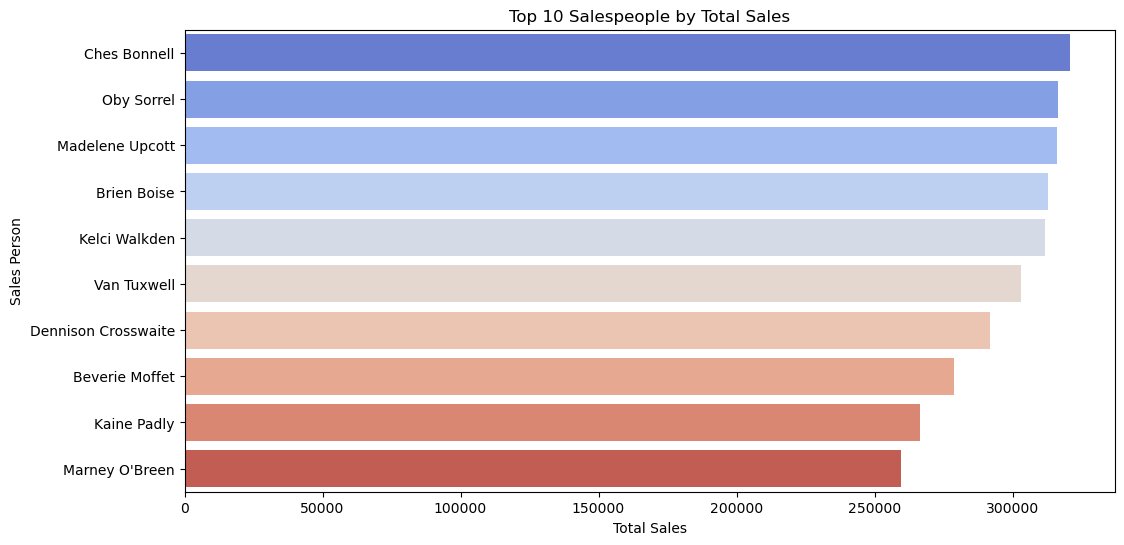

In [29]:
top_salespeople = df_choc.groupby('Sales Person')['Amount'].sum().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=top_salespeople, x='Amount', y='Sales Person', palette='coolwarm')
plt.title('Top 10 Salespeople by Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Sales Person')
plt.show()

## (e) Boxes Shipped vs. Amount
### Scatter plot to analyze relationship between Boxes Shipped and Amount.

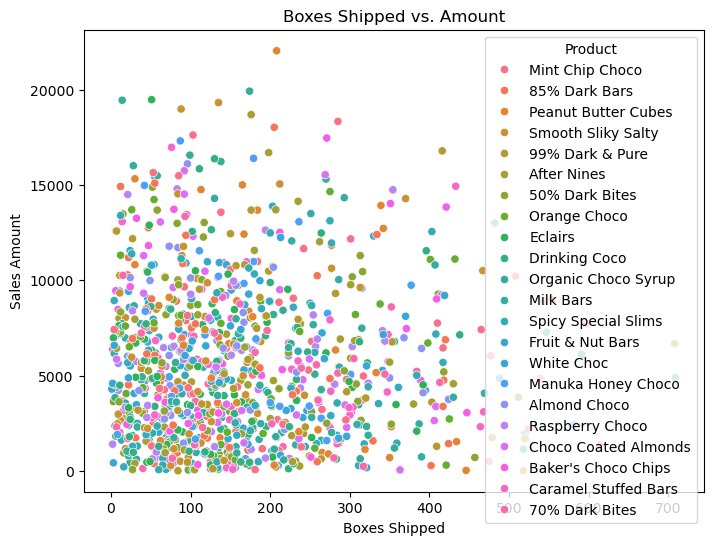

In [30]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_choc, x='Boxes Shipped', y='Amount', hue='Product')
plt.title('Boxes Shipped vs. Amount')
plt.xlabel('Boxes Shipped')
plt.ylabel('Sales Amount')
plt.show()

## (f) Sales Heatmap by Country & Product
### Understand how different products perform in each country.

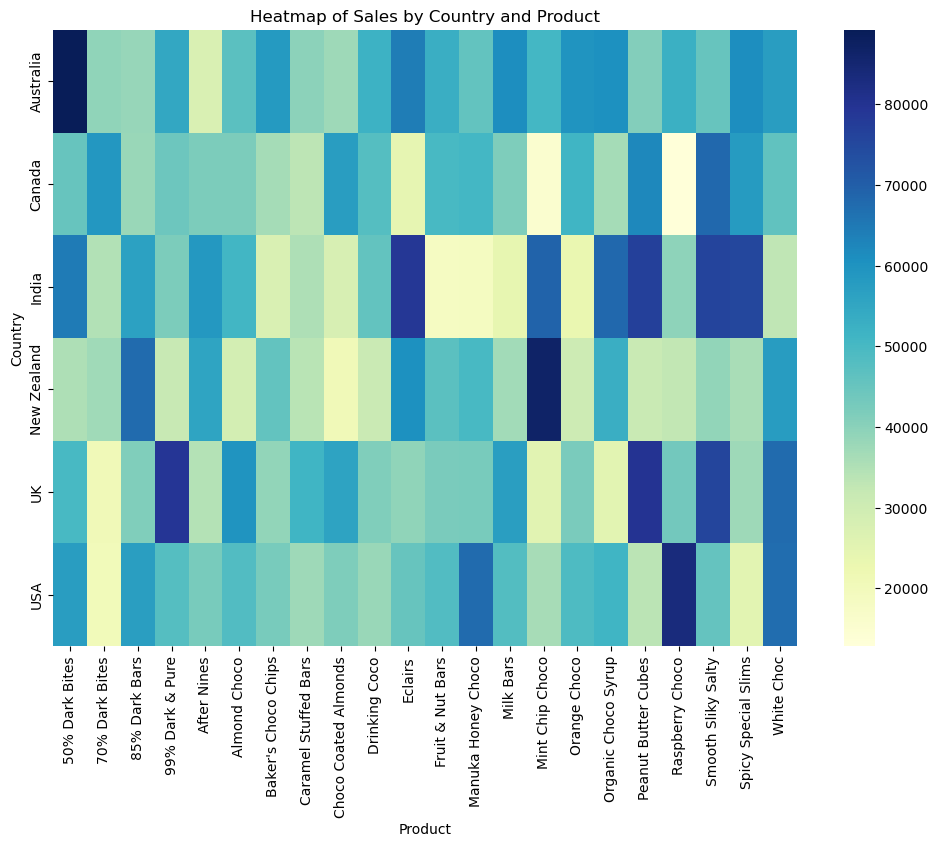

In [31]:
pivot = df_choc.pivot_table(index='Country', columns='Product', values='Amount', aggfunc='sum').fillna(0)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot, annot=False, fmt='.0f', cmap='YlGnBu')
plt.title('Heatmap of Sales by Country and Product')
plt.xlabel('Product')
plt.ylabel('Country')
plt.show()

## (g) Monthly Sales Trend per Product
### How each product performs over time.

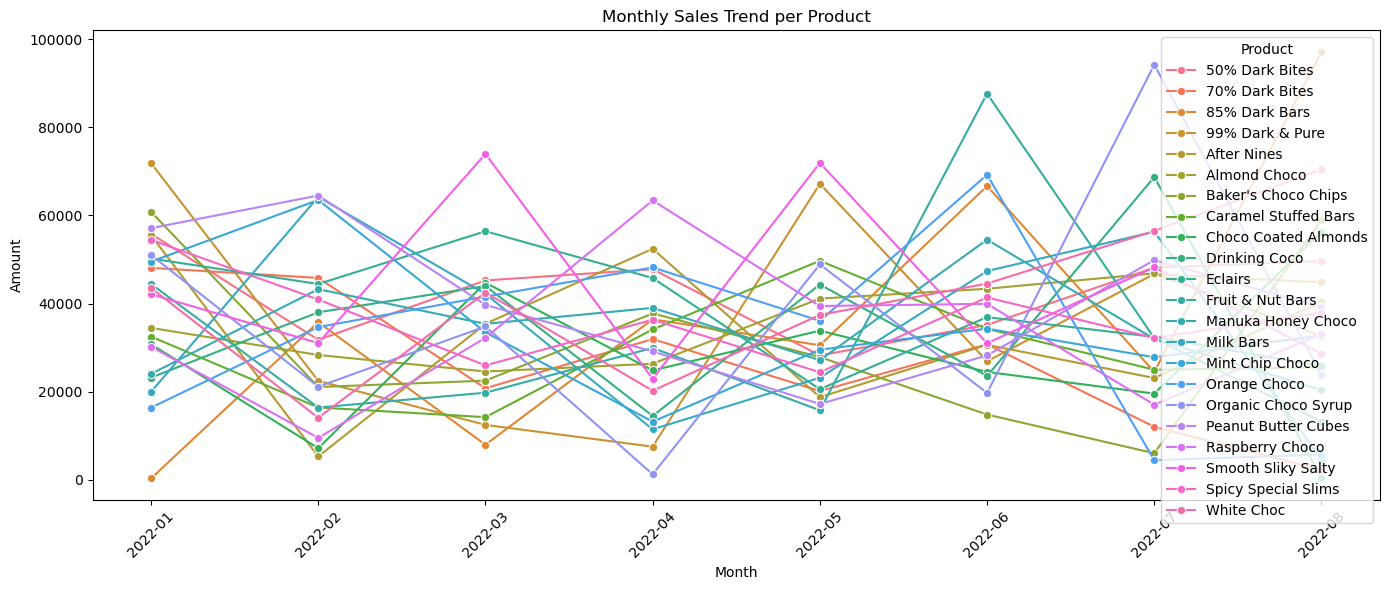

In [32]:
df_choc['Month'] = df_choc['Date'].dt.to_period('M').astype(str)
monthly_product_sales = df_choc.groupby(['Month', 'Product'])['Amount'].sum().reset_index()

plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_product_sales, x='Month', y='Amount', hue='Product', marker='o')
plt.title('Monthly Sales Trend per Product')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

 ## (h) Total Boxes Shipped by Country
### Understand shipping volume by region.

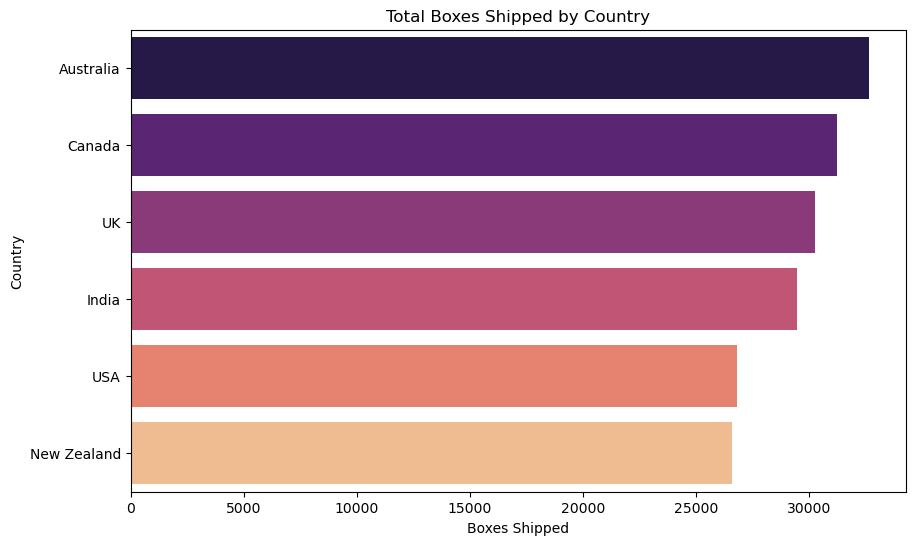

In [33]:
country_boxes = df_choc.groupby('Country')['Boxes Shipped'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=country_boxes, y='Country', x='Boxes Shipped', palette='magma')
plt.title('Total Boxes Shipped by Country')
plt.xlabel('Boxes Shipped')
plt.ylabel('Country')
plt.show()

## (i) Average Sale per Box by Product
### Shows how much revenue is generated per box for each product.

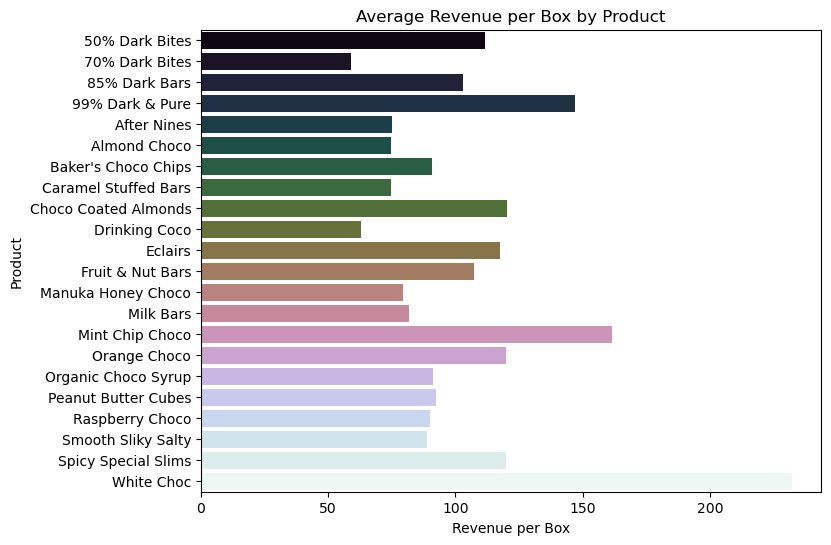

In [34]:
df_choc['Revenue per Box'] = df_choc['Amount'] / df_choc['Boxes Shipped']
avg_per_box = df_choc.groupby('Product')['Revenue per Box'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(data=avg_per_box, x='Revenue per Box', y='Product', palette='cubehelix')
plt.title('Average Revenue per Box by Product')
plt.show()

## (j) Sales Distribution per Salesperson
### How spread out the sales amounts are for each salesperson.

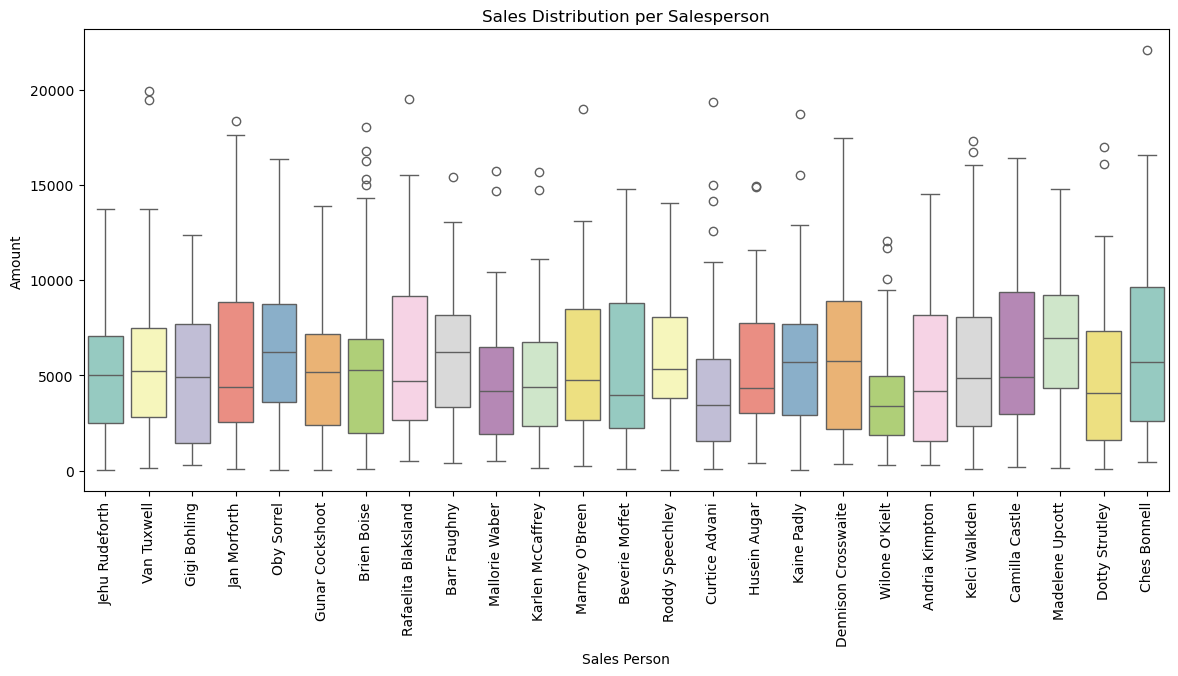

In [35]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_choc, x='Sales Person', y='Amount', palette='Set3')
plt.title('Sales Distribution per Salesperson')
plt.xticks(rotation=90)
plt.show()

 ## (k) Sales Time Series Decomposition (Optional if you want seasonal trends)
### Requires statsmodels:

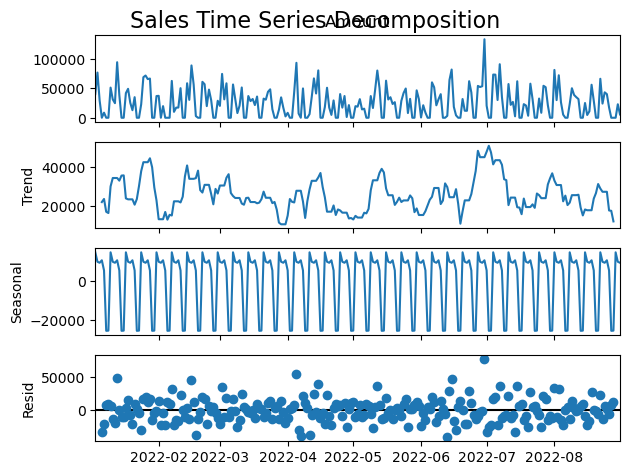

In [36]:
from statsmodels.tsa.seasonal import seasonal_decompose

df_ts = df_choc.groupby('Date')['Amount'].sum().asfreq('D').fillna(0)
result = seasonal_decompose(df_ts, model='additive')

result.plot()
plt.suptitle('Sales Time Series Decomposition', fontsize=16)
plt.show()